## Project 9: A Data Analysis of Your Own

Olivia Rigatti

For my project I decided to work with electric vehicle data collected from the state of Washington. The data shows information for each electric car in Washington including what city it is from and the make/model of the car. For this project I am going to answer the following questions:

- How have electric and hybrid car usage changed over time? - Is one more prominent than the other? - Has it always been this way or did it change?
- Has the ‘main’ electric brand changed over time or has it always been the same?
- How many of these cars actaully qualify for Clean Alternative Fuel Vehicle (CAFV) Eligibility?


### Part 1: How have electric and hybrid car usage changed over time?

The first thing I noticed when I originally examined the dataset is that it includes both hybrid and pure electric cars. In recent years it seems that electric cars, both hybrid and non-hybrid have gotten more popular. However, I have never known or seen anything (although I am sure there are artcles about this) that talks about which is more popular. As I know people who have hyrbids and others who have pure electric vehicles I wanted to see if one is more popular than the other. I also want to see how that popularity has changed over time. I know that electric cars have started to get better range so I was thinking maybe originally hybrids were more popular and then people shifted to electric cars as they improved. 

To begin this analysis we first need to import all the necessary packages and load the data frame. 

In [48]:
# Import necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

The original data file I downloaded from the data.gov website was too large to upload to Github so after doing my analysis I made a smaller dataframe and included the columns I needed as well as a few more that were related to the car specs. This is just so the reader could see some of the other information that was given in the data. If interested in the seeing the full data it can be found at https://catalog.data.gov/dataset/electric-vehicle-population-data.

In [78]:
# Load the data into a dataframe
df = pd.read_csv('Electric_Vehicle_Population_Data2.csv')

Now that we have loaded the data let's take a quick look at it to see what type of columns we are working with and what information is available. 

In [79]:
# Examine the data
df.head()

,Unnamed: 0,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33
1,1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32
2,2,Yakima,Yakima,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
3,3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
4,4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151


From this I notice that there is no year that the car owner registered their car. The only year we have is the make of the car. This means when I am doing my analysis that I will be looking at the car manufacturing over time rather than the amount of cars that were present at that time. This is because someone could have bought an electric car in 2020 but it is a 2017 model. This is somewhat of a limitation but it still allows me to get an idea of how electric car usage/manufacturing has been changing and give some insights into the area. 

I also noticed that there are some numerical columns, so I want to take a quick look at the stats of the columns. I will do this using the .describe() function which will give me a summary of stats for each numerical column. 

In [80]:
# Describes the data
df.describe()

,Unnamed: 0,Model Year,Electric Range
count,159467.000000,159467.000000,159467.000000
mean,79733.000000,2020.192510,64.283319
std,46034.302026,3.010564,94.634277
min,0.000000,1997.000000,0.000000
25%,39866.500000,2018.000000,0.000000
50%,79733.000000,2021.000000,14.000000
75%,119599.500000,2023.000000,84.000000
max,159466.000000,2024.000000,337.000000


From the information above I can see that the oldest electric car currently registered in Washington is from 1997. That seems pretty old. Techincally the first electric car was made in 1890 (this link has more information if you're interested in the history of the electric car https://www.energy.gov/articles/history-electric-car#:~:text=Here%20in%20the%20U.S.%2C%20the,spark%20interest%20in%20electric%20vehicles). However, they have just recently been becoming more popular. This makes me think there might be some cars from in the 1990s and early 2000s that will make our visualizations a little unclear but not add much to our data. I wanted to see how many cars there were before 2010 so I looked at the at the length of the list of cars that were made before 2010. 

In [52]:
# Returns the length of the list of cars made before 2010
len(df[df['Model Year'] < 2010])

37

So there are only 37 cars registered as made before 2010. As most of my analysis is going to come from my visualization, and 37 cars spread over 13 years is not many, I am going to create a new dataframe that filters for cars with a model year of after 2010. This will make the visualizations a little easier to interpret and just look a little nicer. 

In [53]:
# Creates new dataframe with cars made after 2010
df_rec = df[df['Model Year'] > 2010]

Let's take a quick look to make sure a dataframe was actually created. 

In [81]:
# Examines the dataframe
df_rec.head()

,Unnamed: 0,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33
1,1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32
2,2,Yakima,Yakima,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
3,3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
4,4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151


I'm also going to check the summary stats again to make sure that the correct years of cars were filtered out. 

In [82]:
df_rec.describe()

,Unnamed: 0,Model Year,Electric Range
count,159406.000000,159406.000000,159406.000000
mean,79732.569508,2020.197684,64.238078
std,46033.037291,2.998387,94.612498
min,0.000000,2011.000000,0.000000
25%,39866.250000,2018.000000,0.000000
50%,79733.500000,2021.000000,14.000000
75%,119594.750000,2023.000000,84.000000
max,159466.000000,2024.000000,337.000000


Great, now the oldest car is from 2011 just like I wanted.

Now that I have a dataframe with cars made after 2010 I want to exmaine just the pure electric cars and then just the hybird cars before I look at the two of them together. To do this I am going to create two new dataframes. One called df_bev which looks at pure electric cars and one called df_phev which looks at hybrids. Although bev and phev seem like odd names they correspond to BEV: Battery Electric Vehicle and PHEV: Plug-in Hyrbid Electric Vehicle. 

In [54]:
# Creates a new dataframe with only pure electric cars
df_bev = df_rec[df_rec['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

Now that we have the dataframe created let's take a quick look at it to make sure that we really do have the correct information. 

In [55]:
# Examines the dataframe
df_bev.head()

,Unnamed: 0,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
2,2,Yakima,Yakima,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
3,3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
4,4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151
5,5,Kitsap,Port Orchard,WA,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239
7,7,Yakima,Yakima,WA,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0


In [56]:
# Creates a dataframe with only hybrid cars
df_phev = df_rec[df_rec['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

Once again I am going to take a quick look at the dataframe to make sure I created it correctly. 

In [57]:
# Examines the dataframe 
df_phev.head()

,Unnamed: 0,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33
1,1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32
6,6,Yakima,Yakima,WA,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12
8,8,Kitsap,Olalla,WA,2012,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6
11,11,Thurston,Rainier,WA,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19


Now that I have the two dataframes created I am going to plot the information individually for each type of electric car and take a look at the manufacturing amount over time. I am going to use seaborn to create these graphs. If you are intersted, you can find more information about the seaborn displot at https://seaborn.pydata.org/generated/seaborn.displot.html. 

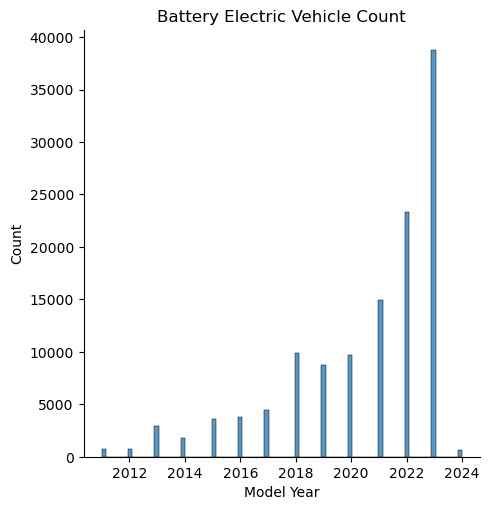

In [58]:
# Creates bar graph for pure electric cars using model year
ax = sns.displot(data = df_bev, x = 'Model Year')

# Sets title 
ax.set(title = "Battery Electric Vehicle Count")

From the graph above I can see that the number of recently manufactured battery powered electric cars in Washington has definitely increased. If we assume, just because no other information is available to us right now, that the model of the car is the year that the owner bought and registered the car, then electric cars have gotten a lot more popular in Washington over the last couple years. Even accounting for some people having bought used cars and potentially selling their old cars, it seems like electric car usage has gone up. 

It might seem a little weird to see some 2024 cars counted on the graph even though it is 2023. That is because a lot of car companies release the next years model in the year before, normally around October, but they will sometimes do this in the middle of the year. Since this data set was updated most recently on November 17th 2023 it has some 2024 car models. 

Now let's take a look at the Plug-in Hybrid cars. 

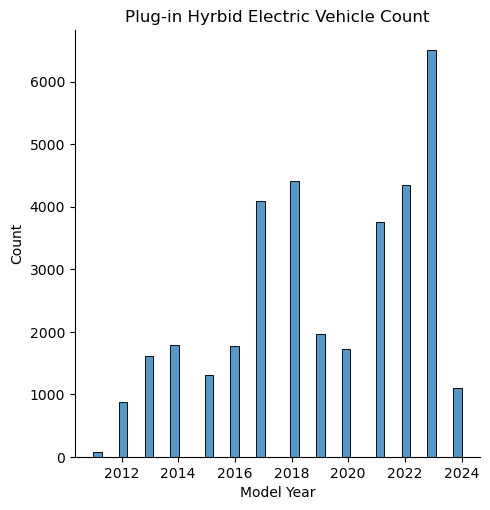

In [59]:
# Creates bar graph for hybrid cars using model year
ax = sns.displot(data = df_phev, x = 'Model Year')

# Sets title
ax.set(title="Plug-in Hyrbid Electric Vehicle Count")

From the Plug-in hybrid graph we can see there has also been some increase in hybrid cars. However, it is intersting to notice that there is a lot more varibility in this graph than the pure electric car graph. Whereas the other graph seemed to be continuously increasing this graph includes more ups and downs. However, overall it seems the number of hybrid cars has also increased. 

Looking at the y-axis I can see that the scale of the two graphs is very different. To see how they compare to each other I want to graph them an the same axis so it is easier to see the difference between the two graphs. 

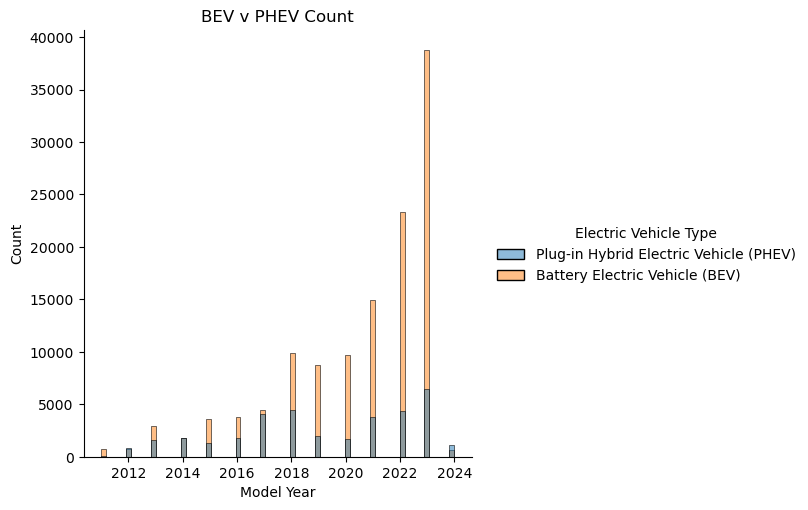

In [60]:
# Creates an overlaid bar chart with hybrid and pure electric cars
ax = sns.displot(data = df_rec, x = 'Model Year', hue = 'Electric Vehicle Type')

# Sets the title
ax.set(title = "BEV v PHEV Count" )

From this graph it is clear that on average there are more battery electric vehicles than there are hybrid vehicles. Also, for more recent models there are a lot more battery electric cars than there are hybrids. This might be because electric cars have become more efficient so people buy them over hybrids. It is also possible that people had hybrids and then bought pure electric cars because they needed new cars. There do seem to be a couple years where the number of hybrid cars is the same or larger than the number of battery electric cars. Let's take a closer look at these years to see what the actual difference is. 

To begin I will look at 2014 and then I'll take a look at 2012. 

In [61]:
# Gets length of list of BEV cars with model year 2014
len(df_bev[df_bev['Model Year'] == 2014])

1777

In [62]:
# Gets length of list of PHEV cars with model year 2014
len(df_phev[df_phev['Model Year'] == 2014])

1784

Wow there are actually more hyrbid cars from 2014 then pure electric cars from 2014 registred in Washington. Now this does not mean that in 2014 there were more hybrids than electric cars in Washington. It is entirely possible that there were more pure electric cars but those owners sold them and bought newer models. However, if this was the case it makes me wonder if people trade-in or sell their electric cars for newer models more often than hybrid owners. 

Now I am going to look at 2012. 

In [63]:
# Gets length of list of BEV cars with model year 2012
len(df_bev[df_bev['Model Year'] == 2012])

772

In [64]:
# Gets length of list of PHEV cars with model year 2012
len(df_phev[df_phev['Model Year'] == 2012])

873

Once again there are more hyrbid cars from 2012 than battery electric cars. This difference is larger than the one in 2014. There is a 101 car difference rather than the 7 car difference we saw in 2014. Again, this does not mean that in 2012 there were more hybrids than electric cars in Washington. However, it makes me want to investigate hyrbid vs battery electric car turnover rate. Now that I have examined the type of electric car over model year I am going to move on to my second question. 

### Part 2: Who is the main EV supplier? Has this changed over time?

For my second question I want to see who the main electric vehicle supplier is, and if this supplier has changed over time. Again, since we don't have the registered date of the vehicle we will just be looking at model year. However, this works a little bit better than it did in question 1 because we can see which company manufactured the most cars in that year for current Washington residents. 

To begin let's just see who the current overal main EV supplier is in Washington. I will do this using the .value_counts() function. 

In [83]:
# Counts values for 'Make' column in the data frame. 
df_rec['Make'].value_counts()

TESLA             72403
NISSAN            13795
CHEVROLET         12567
FORD               7997
BMW                6842
KIA                6754
TOYOTA             5532
VOLKSWAGEN         4424
VOLVO              3746
JEEP               3690
HYUNDAI            3671
AUDI               3246
RIVIAN             2934
CHRYSLER           2859
MERCEDES-BENZ      1189
PORSCHE            1065
MITSUBISHI          911
HONDA               833
MINI                821
POLESTAR            804
FIAT                795
SUBARU              690
SMART               276
MAZDA               269
LINCOLN             236
JAGUAR              220
LUCID               208
LEXUS               201
CADILLAC            197
GENESIS             130
LAND ROVER           48
ALFA ROMEO           19
FISKER               17
AZURE DYNAMICS        8
TH!NK                 5
DODGE                 2
BENTLEY               2
Name: Make, dtype: int64

Since there are a lot of different brands I am going to focus on the top three. Since the top three brands are Tesla, Chevrolet, and Nissan I decided to make a new dataframe that consists only of cars of the models. I did this by filtering the 'Make' column. 

In [66]:
# Creates dataframe for cars of brand Tesla, Nissan, and Chevrolet
df_models = df_rec[(df_rec['Make'] =='TESLA') | (df_rec['Make'] =='CHEVROLET') | (df_rec['Make'] =='NISSAN') ]

To make sure the code above accomplished what I wanted it to it is a good idea to examine the new dataframe. 

In [67]:
# Examines new dataframe
df_models.head()

,Unnamed: 0,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
3,3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
4,4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151
7,7,Yakima,Yakima,WA,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
9,9,Kitsap,Poulsbo,WA,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
10,10,Kitsap,Bainbridge Island,WA,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84


Now that I made this new dataframe I knew I wanted to make a graph but did not know what type would best show the change in the brands. I talked to Professor Wirfs-Brock and she told me that I could use groupby to create some sort of stacked barchart, or area graph that would display the differences in the data. I got a little confused how to use groupby to create a graph so I looked online to see if I could find anything that would help. I went to stackoverflow (link below) and adapted the post by justanothercoder for what I needed. 

https://stackoverflow.com/questions/34917727/stacked-bar-plot-by-grouped-data-with-pandas

Text(0.5, 1.0, 'Make v Model Year')

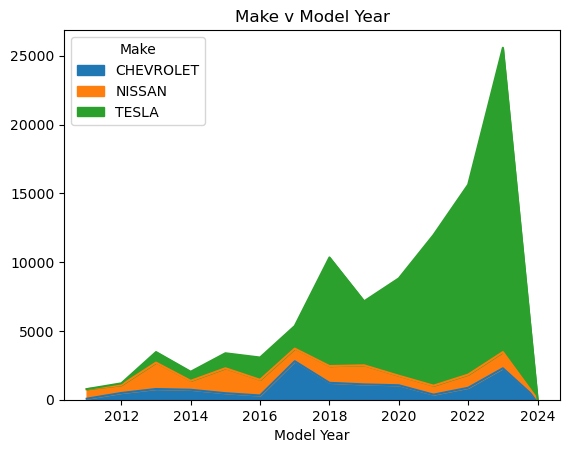

In [68]:
# Creates stacked area chart grouping by Model Year and Make
df_models.groupby(['Model Year', 'Make']).size().unstack().plot(kind='area', stacked = True)

# Sets title
plt.title('Make v Model Year')

From the stacked area graph it is clear that in recent years Tesla has definifetly been the largest electric brand in Washington. However, earlier in the 2010s around 2013 it seems like Nissan was popular and in 2017 it seems like Chevrolet was popular. Although these are not the years the cars were registered, just the model year, given that people get a new car on average every eitgh years it is reasonable to think tha this somewhat accurately reflects the car population at that time. Also, before 2012 Tesla was not as popular as Nissan or Chevrolet. This makes sense as Tesla was only founded in 2003 and started to see more popularity after 2012. Nissan and Chevrolet were already established companies in the market. 

Given this anlysis and visualizations Tesla has clearly been the 'main player' in electric cars in recent years. 

### Part 3: How many of these cars actaully qualify for Clean Alternative Fuel Vehicle (CAFV) Eligibility?

When I was looking at the dataframe I noticed that there was a column with the heading Clean Alternative Fuel Vehicle (CAFV) Eligibility. When looking at the entries in that column I noticed that some said 'Not eligible due to low battery range'. I thought that all electric cars counted as clean vehicles and were considered to be an alternative fuel vehicle. I found it (and still do find it) interesting that not all electric cars are actually considered to be a clean fuel vehicle. I became curious if most people are driving cars that are not actually clean when they think that the car is considered clean. For this reason I decided I wanted to take a look at the percent of cars the are not eligible due to low battery range.  

To do this I started with using the .value_counts() function. 

In [69]:
# Counts values in CAFV column
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    77195
Clean Alternative Fuel Vehicle Eligible                         63824
Not eligible due to low battery range                           18448
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

Okay, so from the output above we can see that most of the cars are not classified because not enough research has been done. Despite this I decided to calculate the proportions for each possible output. To do this I first got the total number of cars in the dataframe, which is the same as the length of the dataframe. 

In [70]:
# Calculates length of data frame
car_num = len(df)

Now that I have the length of the dataframe I calculated the percentages by using the outputs from when I used the .value_counts() function. 

In [71]:
# Percenatge of non-eligible cars
18448/car_num

0.11568537691183756

In [72]:
# Percentage of unknown
77195/car_num

0.4840813459838086

In [73]:
# Percentage of clean cars
63824/car_num

0.40023327710435386

From the calulations above we can see that the percent of non-eligible cars is 11.5%, the percent of eligible cars is 40.1%, and the percent of unknown eligibility is 48.4%. A lot of the cars are actually of unkown eligibility. I was curious what the percentages are when we disregard the unknown eligibility. This means rather than dividing by the length of all cars we have to divide by the length of the dataframe minus the unknown eligibility cars. 

In [74]:
# Calculate new size of car population
car_elig = len(df)-77195

In [75]:
# Caclulates the percentage of non-eligible cars
18448/car_elig

0.22423181641384676

In [76]:
# Calculates percentage of clean cars
63824/car_elig

0.7757681835861533

Without the unknown eligibility cars we see that the percentage of clean cars is now 77.5% and the percentage of ineligible cars is 22.5%. So a little less than a quarter of the known cars are actually not considered clean vehicles! That is really suprising to me because I thought it would be a lot lower. If we did have research on all the cars the ratio might be a little bit different but we do not have enough information to predict what that new ratio would be. 

Now that I have done the numerical analysis I am curious what this looks like visually. To do this I used seaborn again and this time made a countplot. If you want to know more about the sns countplot you can find the documentation here https://seaborn.pydata.org/generated/seaborn.countplot.html. 

[Text(0.5, 1.0, 'CAFV Type Car Count')]

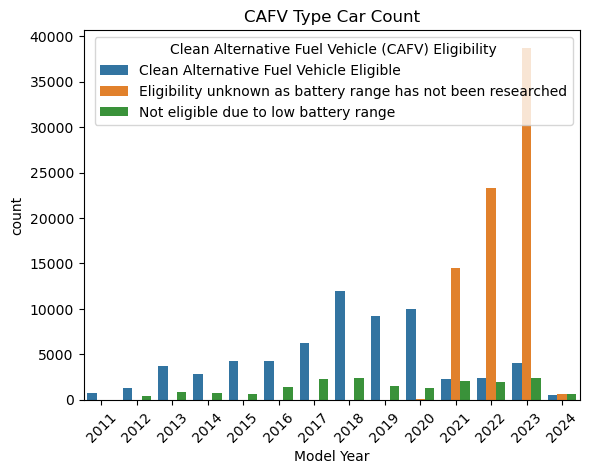

In [77]:
# Creates bar chart with the different CAFV classifications
ax = sns.countplot(data = df_rec, x = 'Model Year', hue = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')

# Changes rotation of x-labels
ax.tick_params(axis='x', rotation=45)

# Sets graph title
ax.set(title = 'CAFV Type Car Count')

From the graph we can see that most of the cars from 2019 and before are considered clean alternative fuel vehicles. It's also pretty clear that the newer cars are the ones that tend not to be researched yet. This actually makes a lot of sense. Since the cars are newer, some of them being released only several months ago, there has not been enough time to fully research all of these vehicles. It also seems like research is being prioritized for the older cars and then catching up to the newer cars. I can tell this from the graph because the unknown eligibility bars are growing from when they first appear (very miniscule) in 2020 and go to 2023. Although there is a dip in 2024 barely any 2024 cars are present in the data because they are so new so it is not necessarily representative of the overall trends I have seen. 

From all this we have seen that electric cars seem to have been increasing over the last several years. We also saw that Tesla has been the main electric car supplier the last several years. Lastly, we learned that most electric cars in Washington are considered clean alternative fuel vehicles, but not all of them. That concludes my analysis of the electric vehicle data for Washington. 